<a href="https://colab.research.google.com/github/wujj0326/d3/blob/master/Week4_Auto_Fuel_Economy_with_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 4: NumPy Array

This topic is about learning to work with Numerical Python (NumPy), one of the most popular libraries in Python. It makes it very easy to work with multi-dimensional numerical arrays and matrices with lending support for many mathematical functions.

Please follow the following project to explore how NumPy would be useful in numerical data analysis.

##Project: Auto Fuel Efficiency
In this project we try to use all what we have learned so far, and mainly the numpy arrays to look into auto fuel efficiency and the factors that may contribute to that. Let's import our [datafile mpg.csv](https://drive.google.com/open?id=1u18kK0fEuXK7InOvpKTkz1yEbNlIM4i7), which contains fuel economy data for 398 cars. Here are the variables included in the dataset.
* mpg: miles per gallon
* cylinders: # of cylinders
* displacement: engine displacement in liters
* horsepower: engine horsepower
* weight: vehicle weight
* acceleration
* model_year: year manufactured
* origin: 1: North America;  2: Europe;  3: Asia and others
* name: name of the car including make and model

As for the first step, read open the file in a variable and read it as a csv file and load it into a list variable using the csv library. Checkout the first few items in the list. What does that look like?

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mpg.csv to mpg.csv


In [3]:
# First you should download the mpg.csv dataset from the above link to your computer. Then use the LEFT sidebar menue on this page 
# (Files --> Upload) to upload the scv to your colab session. You would have to do this every time you close your colab session.
# After you uploaded the csv to your colab seccion, use this code to import the csv file into a list
import csv

csvfile=open('mpg.csv') # open the file into a variable
mpg = list(csv.reader(csvfile)) # read the file as csv and then transfer it to a list
mpg[:3] # check out the first three items in our list.


[['mpg',
  'cylinders',
  'displacement',
  'horsepower',
  'weight',
  'acceleration',
  'model_year',
  'origin',
  'name'],
 ['18',
  '8',
  '307',
  '130',
  '3504',
  '12',
  '70',
  '1',
  'chevrolet chevelle malibu'],
 ['15', '8', '350', '165', '3693', '11.5', '70', '1', 'buick skylark 320']]

We do not need the column headings as the first item. Lets move the headings to another variable.

In [0]:
headings=mpg[0]
mpg1=mpg[1:]
# print(mpg)
# print(mpg1)

Try transforming the mpg dataset to NumPy array. What happens? 

Fix the issue by moving the name column to another list. You may do this any way you can and print out both the names and the mpg datasets. Can you do it with list comprehension?

In [5]:
import numpy as np
npmpg=np.array(mpg)
# all of list have been tranformed to a 2D array,but array could only store one data type. Therefore, it has all been defaulted String
print(mpg[:3])
print(npmpg[:3])


[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name'], ['18', '8', '307', '130', '3504', '12', '70', '1', 'chevrolet chevelle malibu'], ['15', '8', '350', '165', '3693', '11.5', '70', '1', 'buick skylark 320']]
[['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
  'model_year' 'origin' 'name']
 ['18' '8' '307' '130' '3504' '12' '70' '1' 'chevrolet chevelle malibu']
 ['15' '8' '350' '165' '3693' '11.5' '70' '1' 'buick skylark 320']]


In [6]:
names=[sub[-1] for sub in mpg1]
mpg2=[sub[:8] for sub in mpg1]
print(names[:3])
print(mpg2[:3])

['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite']
[['18', '8', '307', '130', '3504', '12', '70', '1'], ['15', '8', '350', '165', '3693', '11.5', '70', '1'], ['18', '8', '318', '150', '3436', '11', '70', '1']]


Try transforming the mpg dataset to NumPy array. What happens?

To fix the issue, replace the '?' values with None which represents missing values in Python. Try again for transforing the mpg dataset to numpy array. Make sure the array items are of float format.

In [7]:
npmpg2=np.array(mpg2)
print(npmpg2[:3])

# a = [i for i in mpg2 if '?' in i]
# a = np.array(a)
# b = [x if x !="?" else None for x in a[0]]
# print(a)
# print(b)

[['18' '8' '307' '130' '3504' '12' '70' '1']
 ['15' '8' '350' '165' '3693' '11.5' '70' '1']
 ['18' '8' '318' '150' '3436' '11' '70' '1']]


In [8]:
# mpg3=[x if x !="?" else None for x in mpg2]
mpg3 = [[x if x!='?' else None for x in i] if '?' in i else i for i in mpg2]
# print([i for i in mpg3 if "?" in mpg3])
npmpg3 = np.array(mpg3).astype(np.float32)

print(mpg3[:3])
print(npmpg3)

[['18', '8', '307', '130', '3504', '12', '70', '1'], ['15', '8', '350', '165', '3693', '11.5', '70', '1'], ['18', '8', '318', '150', '3436', '11', '70', '1']]
[[ 18.    8.  307.  ...  12.   70.    1. ]
 [ 15.    8.  350.  ...  11.5  70.    1. ]
 [ 18.    8.  318.  ...  11.   70.    1. ]
 ...
 [ 32.    4.  135.  ...  11.6  82.    1. ]
 [ 28.    4.  120.  ...  18.6  82.    1. ]
 [ 31.    4.  119.  ...  19.4  82.    1. ]]


To make your data analysis easier, you may chose to read each column in a separate one dimensional array, and give them their heading names.

In [0]:
new_headings=headings[:8]

# for i in range(8):
#   str(new_headings[i])=[npmpg3[:,i]]

# mpg=[npmpg3[:,0]]
# cylinders=[npmpg3[:,1]]
# displacement=[npmpg3[:,2]]
# horsepower=[npmpg3[:,3]]
# weight=[npmpg3[:,4]]
# acceleration=[npmpg3[:,5]]
# model_year=[npmpg3[:,6]]
# origin=[npmpg3[:,7]]
# def onedarray(num):
#   data = npmpg3[:,num]
#   return data
  
# for i in range(len(new_headings)):
#   exec(f'{new_headings[i]}= onedarray(i)')
  
for i in range(len(new_headings)):
  exec(f'{new_headings[i]}=npmpg3[:,i]')
  
# d={
#      'mpg':[npmpg3[:,0]],
#      'cylinders':[npmpg3[:,1]],
#      'displacement':[npmpg3[:,2]],
#      'horsepower':[npmpg3[:,3]],
#      'weight':[npmpg3[:,4]],
#      'acceleration':[npmpg3[:,5]],
#      'model_year':[npmpg3[:,6]],
#      'origin':[npmpg3[:,7]]
# }


Calculate the average mpg for cars based on their number of cylendars. It means the average mpg for cars with 3, 4, 5, and other number of cylendars.

Next, change the code to a function and use that function to calculate average mpg for each model_year.

In [65]:
def avg_mpg(x):
  all_type=set(x)
  for i in all_type:
    print(i,mpg[x==i].mean()) 
# avg_mpg(model_year)

def a2(x):  
  all_type=set(x)
  y=[]
  for i in all_type:
    y.append(mpg[x==i].mean())
  return y
#a2(cylinders)

def a3(x):
  all_type=set(x)
  avg = [(i,mpg[x==i].mean()) for i in all_type]
  return avg
a3(cylinders)



[(3.0, 20.55),
 (4.0, 29.286764),
 (5.0, 27.366667),
 (6.0, 19.985714),
 (8.0, 14.963106)]

Create a new column that includes only the make (manufacturer) of each car, like 'ford', 'chevy' and like that. Use the previous function and this new column to calculate the average mpg for each manufacturer.

In [66]:
# print(names[0])
new_name = [str(i).split(' ',1)[0] for i in names]
#print(new_name)
a3(np.array(new_name))

[('pontiac', 20.0125),
 ('volvo', 21.116667),
 ('subaru', 30.525002),
 ('mercedes', 25.4),
 ('toyouta', 23.0),
 ('audi', 26.714285),
 ('chrysler', 17.266666),
 ('vokswagen', 29.8),
 ('chevrolet', 20.472094),
 ('opel', 25.75),
 ('maxda', 26.05),
 ('mercury', 19.118181),
 ('volkswagen', 29.106667),
 ('amc', 18.246428),
 ('datsun', 31.113045),
 ('capri', 25.0),
 ('saab', 23.9),
 ('hi', 9.0),
 ('triumph', 35.0),
 ('mazda', 30.86),
 ('chevy', 18.0),
 ('renault', 32.879997),
 ('peugeot', 23.6875),
 ('ford', 19.694118),
 ('honda', 33.76154),
 ('mercedes-benz', 23.25),
 ('oldsmobile', 21.1),
 ('dodge', 22.060715),
 ('nissan', 36.0),
 ('plymouth', 21.703228),
 ('toyota', 28.372),
 ('cadillac', 19.75),
 ('bmw', 23.75),
 ('vw', 39.016666),
 ('fiat', 28.9125),
 ('chevroelt', 16.0),
 ('buick', 19.182354)]

Count the number of cars in the dataset for each manufacturer.

In [64]:
def a4(x):
  all_type=set(x)
  count = [(i,new_name.count(i)) for i in all_type]
  return count
a4(new_name)

[('pontiac', 16),
 ('volvo', 6),
 ('subaru', 4),
 ('mercedes', 1),
 ('toyouta', 1),
 ('audi', 7),
 ('chrysler', 6),
 ('vokswagen', 1),
 ('chevrolet', 43),
 ('opel', 4),
 ('maxda', 2),
 ('mercury', 11),
 ('volkswagen', 15),
 ('amc', 28),
 ('datsun', 23),
 ('capri', 1),
 ('saab', 4),
 ('hi', 1),
 ('triumph', 1),
 ('mazda', 10),
 ('chevy', 3),
 ('renault', 5),
 ('peugeot', 8),
 ('ford', 51),
 ('honda', 13),
 ('mercedes-benz', 2),
 ('oldsmobile', 10),
 ('dodge', 28),
 ('nissan', 1),
 ('plymouth', 31),
 ('toyota', 25),
 ('cadillac', 2),
 ('bmw', 2),
 ('vw', 6),
 ('fiat', 8),
 ('chevroelt', 1),
 ('buick', 17)]

Calculate the correlation beween mpg and other variables, like displacement, horsepower, wight and others. What are the most and least influential variables on auto fuel economy?

In [63]:
# np.corrcoef(mpg,horsepower)
# np.corrcoef(mpg,npmpg3[:,1])
# print(npmpg3[:,0])
# for i in range(len(cheadings)):
#    exec(f'{cheadings[i]}=np.corrcoef(mpg,npmpg3[:,i])')

cc=[(new_headings[i],np.corrcoef(mpg,npmpg3[:,i])) for i in range(8)]
print(cc)



[[ 1. nan]
 [nan nan]]
[('mpg', array([[1., 1.],
       [1., 1.]])), ('cylinders', array([[ 1.        , -0.77539629],
       [-0.77539629,  1.        ]])), ('displacement', array([[ 1.        , -0.80420283],
       [-0.80420283,  1.        ]])), ('horsepower', array([[ 1., nan],
       [nan, nan]])), ('weight', array([[ 1.        , -0.83174093],
       [-0.83174093,  1.        ]])), ('acceleration', array([[1.       , 0.4202889],
       [0.4202889, 1.       ]])), ('model_year', array([[1.        , 0.57926714],
       [0.57926714, 1.        ]])), ('origin', array([[1.        , 0.56345036],
       [0.56345036, 1.        ]]))]


Use matplotlib library to plot average mpg for each manufacturer.

Next, change your code to a function that plots average mpg for every variable it is given. Use the function to plot average mpg for each origin.

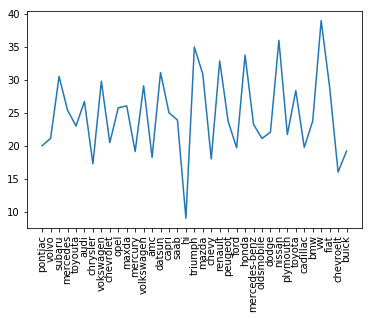

In [101]:
import matplotlib.pyplot as plt
avg_make=a3(np.array(new_name))
x=[avg_make[i][0] for i in range(len(avg_make))]
y=[avg_make[i][1] for i in range(len(avg_make))]
plt.plot(x,y)
plt.xlabel='manufacturer'
plt.ylabel='average'
plt.xticks(rotation=90)
plt.show()


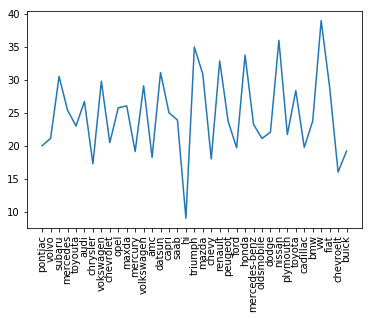

In [103]:
def plot_avg(x):
  avg_in=a3(np.array(x))
  x=[avg_in[i][0] for i in range(len(avg_make))]
  y=[avg_in[i][1] for i in range(len(avg_make))]
  plt.plot(x,y)
  plt.xlabel='manufacturer'
  plt.ylabel='average'
  plt.xticks(rotation=90)
  plt.show()
  
plot_avg(new_name)